<img src="images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend downloading or pulling the latest version of this notebook from Github.

# Logistic Regression &mdash; Basics

Logistic Regression is one of the foundational techniques in the field of machine learning and statistics, commonly used for solving classification problems. Unlike linear regression, which predicts a continuous value, Logistic Regression focuses on predicting discrete outcomes, such as binary classifications (e.g., yes/no, success/failure). The model is based on the logistic function, or sigmoid curve, which maps predicted values to probabilities between 0 and 1. These probabilities can then be used to assign class labels, making Logistic Regression an intuitive and effective choice for a wide range of applications.

One of the key reasons Logistic Regression is so popular is its simplicity and interpretability. It is straightforward to implement, computationally efficient, and provides meaningful coefficients that indicate the influence of each predictor on the outcome. This clarity makes it a go-to model for beginners in machine learning and for scenarios where understanding the model's behavior is critical, such as in healthcare, finance, and social sciences. Unlike more complex machine learning models like neural networks, Logistic Regression offers a clear and explainable decision boundary.

Logistic Regression is also incredibly versatile. It can handle binary classifications (e.g., determining whether an email is spam or not), multi-class classifications (e.g., identifying handwritten digits), and even ordered outcomes (ordinal Logistic Regression). Additionally, it can incorporate regularization techniques like L1 (Lasso) and L2 (Ridge) to prevent overfitting and enhance performance on large datasets. Its adaptability ensures that it remains relevant despite the rise of more complex models.

Another reason to learn Logistic Regression is its foundational role in understanding advanced machine learning techniques. Many algorithms, such as support vector machines and neural networks, build on concepts introduced in Logistic Regression, such as decision boundaries, probabilities, and optimization techniques like gradient descent. By mastering Logistic Regression, learners gain insights into these underlying principles, making it easier to grasp more complex models.

Finally, Logistic Regression's importance lies in its practical applications and real-world impact. From predicting customer churn in business to diagnosing diseases in medicine, Logistic Regression offers a reliable way to make data-driven decisions. Its ability to balance simplicity with power ensures it remains a cornerstone in the machine learning toolkit. Learning Logistic Regression equips individuals with the skills to tackle numerous classification problems while building a strong foundation for exploring the broader landscape of machine learning.

### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

In [1]:
from src.utils.libimports.logreg import *
from src.utils.data.files import *

#### Download Required Data

Some code examples in this notebook use data that first need to be downloaded by running the code cell below. If this code cell throws any error, please check the configuration file `config.yaml` if the URL for downloading datasets is up to date and matches the one on Github. If not, simply download or pull the latest version from Github.

In [2]:
csi_gender, _    = download_dataset("tabular/classification/example-csi-gender-classification.csv")
breast_cancer, _ = download_dataset("tabular/classification/breast-cancer-wisconsin-classification.csv")

File 'data/datasets/tabular/classification/example-csi-gender-classification.csv' already exists (use 'overwrite=True' to overwrite it).
File 'data/datasets/tabular/classification/breast-cancer-wisconsin-classification.csv' already exists (use 'overwrite=True' to overwrite it).


---

## Motivating Example

Spam emails are unsolicited and often irrelevant messages sent in bulk, usually for advertising, phishing, or spreading malware. These emails typically try to deceive recipients into clicking malicious links, sharing personal information, or purchasing fraudulent products. Spam emails are problematic because they waste time, consume resources, and pose security threats. A large volume of spam clogs email inboxes, making it harder for users to find important messages. Additionally, phishing emails trick users into revealing sensitive information like passwords, banking details, or Social Security numbers, leading to financial loss and identity theft. Malware attachments in spam emails can infect computers, leading to data breaches, ransomware attacks, or system damage. Filtering spam emails is crucial because it protects users from cyber threats, improves productivity, and enhances email security. By using spam filters, organizations and individuals can reduce the risk of scams and phishing attacks, ensuring that only legitimate emails reach their inboxes. Spam detection also helps prevent network congestion and reduces storage costs for email providers.

Let's say we want to build some simple model that classifies if an email is a spam email or a genuine email. Think about how you typically recognize a spam email, or distinguish a spam email from a genuine email. Arguably, many spam emails can by recognized by features such as:
* the number of spammy words (e.g., *"win"*, *"free"*, *"prize"*, *"buy now"*, *"bitcoin"*)
* the number of uppercase words (spam email of use ALL CAPS to grab your attention, e.g., *"BUY NOW!"*)
* the number of special characters such as `!`, `$`, `%` (e.g., *"Buy now!!! only $100 (90% off!!!)"*)
* the number of links (spam emails often contain one or more links to external pages)

Of course, real-world spam filters combine additional and more sophisticated features, but let's limit ourselves to these four features to keep things simple. For one, all features are numerical and can very easily and efficiently be extracted using any modern programming language. When it comes to training a Logistic Regression model for this task, those four features also allow us to make an important assumption: the probability of an email being a spam email only increases or only decreases with the features values going up or down. For example, we can generally assume that the more spammy words an email contains the more likely it is indeed a spam email. This includes that we do *not* assume that the probability of seeing a spam email will decrease even if we see even more spammy words. In other words, we can assume some basic correlation between our feature values and the probability that an email is spam. We will see in a bit why this is an important assumption to make for Logistic Regression.

## Model Definition

### Basic Setup

Logistic Regression is a statistical and machine learning technique used for classification tasks, particularly binary classification. It predicts the probability of an outcome belonging to one of two classes based on input features. Despite its name, logistic regression is not a regression algorithm in the traditional sense, as it is primarily used for classification rather than predicting continuous values.

Logistic Regression &mdash; like Linear Regression &mdash; computes the linear combination (or weighted) sum of its numerical features as core part of the model. Let's denote this linear combination or weighted sum as $z_i$ and to be defined as follows:

$$\large
z_i = w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id}
$$

with $i = 1,..., n$, where

* $n$ is the number of observations (i.e., the number of data samples in our dataset)
* $w_k$ is the $k$-th coefficient, with $w_0$ being the constant term in the model called *bias*, *offset*, or *intercept*
* $x_{ij}$ is the $j$-th predictor variable (e.g., assuming a simple spam classifier: the number of spammy words, he number of special characters, the number of uppercase words, the number of links to external pages) of the $i$-th observation

It is easy to see that $z_i$ can take on any arbitrary value between $-\infty$ and $+\infty$. The goal of Logistic Regression now is to interpret its output as a probability which then can be used to predict if an unseen data sample is more likely to belong to Class $0$ or Class $1$. For any value to be interpreted as a probability this value must be of the range $[0, 1]$. We therefore need some function to map $z_i$ to $[0,1]$. In case of Logistic Regression, this is done using the so-called **Sigmod** function $\sigma$, which is defined as:

$$\large
\sigma(z_{i}) = \frac{1}{1 + e^{-z_{i}}}
$$

To see how the function $\sigma$ behaves, let's quickly plot using the auxiliary method `plot_sigmoid()` provided in `src/utils.py`.

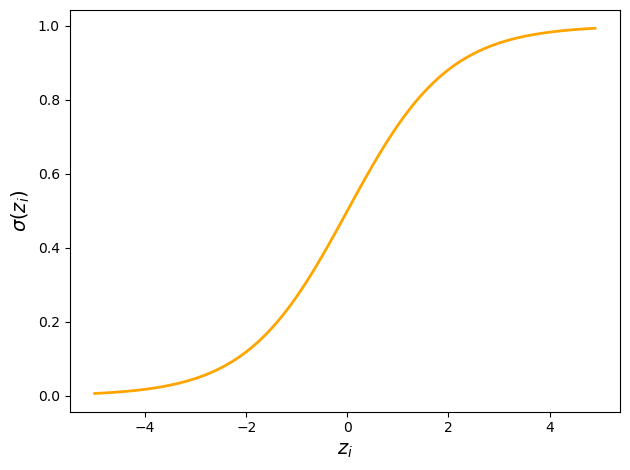

In [3]:
plot_sigmoid()

As the plot above shows, the output of the Sigmoid function is always in the range of $[0,1]$, If the input goes towards $-\infty$, the output goes towards $0$; if the input goes towards $+\infty$, the output goes towards $1$. This allows us now to interpret $\sigma{z_i}$ as a probability. Since we only have a single value but two classes (Class $0$ and Class $1$), we only need to clarify what $\sigma{z_i}$ is expressing. By default, $\sigma{z_i}$ is considered to be the probability that a data sample $x_i$ belongs to Class $1$. With this, we can define the output of a Logistic Regression model as:

$$
\begin{align}
\large y_{i} &= \large P(Y=1|X=x_{i})\\[0.5em]
&= \large \frac{1}{1 + e^{-z_{i}}}\\[0.5em]
&= \large \frac{1}{1 + e^{-(w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id})}}
\end{align}
$$

### Bias Trick

Before we address the task of finding the best weight values $w_0$, $w_1$, $w_2$, ..., $w_d$, let's first try to make the math a bit easier to work with. Notice how in the formula above weight $w_0$ kind of "sticks out" as it is not associated with any feature value. $w_0$ is called the **bias**, or the **intercept**, or the **offset**. The bias term is essential because it allows the model to calculate a weight that is not $0$ even if all inputs feature values $x_{ij}=0$. The bias term gives the model more flexibility to fit the data accurately.

While the bias $w_0$ is in some sense a special weight, we would like to treat it as any other weight to make our notations even simpler. We can accomplish this by introducing a new artificial feature $x_i0$ for all data samples. To ensure that this new feature does not change the equations, we need to set all $x_i0 = 1$. Thus, we can rewrite our equation:

$$
\begin{align}
\large y_{i} &= \large \frac{1}{1 + e^{-(w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id})}}\\[0.5em]
&= \large \frac{1}{1 + e^{-(w_{0}x_{i0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id})}}
\end{align}
$$

If we treat all features $x_{i0}$, $x_{i1}$, $x_2$, ..., $x_{d}$ as a feature vector $\mathbf{x}_i$, and all corresponding weights $w_0$, $w_1$, $w_2$, ..., $w_d$ as a weight vector $w$, we can write the sum as the [dot product](https://en.wikipedia.org/wiki/Dot_product) between this feature vector $\mathbf{x}_{i}$ and the weight vector $\mathbf{w}$:


$$\large
y_{i} = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x_{i}}}}
$$

with

$$\large
\mathbf{w} =
\begin{bmatrix}
	w_{0} \\
	w_{1} \\
	w_{2} \\
	\vdots \\
	w_{d}
\end{bmatrix}\ ,
\qquad
\mathbf{x}_{i} =
\begin{bmatrix}
	x_{i0} \\
	x_{i1} \\
	x_{i2} \\
	\vdots \\
	x_{id}
\end{bmatrix} =
\begin{bmatrix}
	1 \\
	x_{i1} \\
	x_{i2} \\
	\vdots \\
	x_{id}
\end{bmatrix}
$$

where $\mathbf{x}_{i}$ and $\mathbf{w}$ are vectors for $(d+1)$ elements, that is, $\mathbf{x}_{i} \in \mathbb{R}^{d+1}$ $\mathbf{w} \in \mathbb{R}^{d+1}$. Recall that $d$ is the number of original input features, but we also introduced the artificial feature $x_{i0}$ to accommodate the bias $w_0$.


### Matrix Notation

So far, we only considered the equation for Linear Regression with respect to a single data sample $i$. Of course, we want to find the best weight vector $\mathbf{w}$ with respect to *all* the data samples in our training dataset. This gives us the following set of linear equations:

$$
\begin{align}
\large y_1 &= \large \sigma(\mathbf{w}^Tx_1) &= \large \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x_{1}}}}\\[0.5em]
\large y_2 &= \large \sigma(\mathbf{w}^Tx_2) &= \large \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x_{2}}}}\\[0.5em]
\large y_3 &= \large \sigma(\mathbf{w}^Tx_3) &= \large \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x_{3}}}}\\[0.5em]
\vdots\\[0.5em]
\large y_n &= \large \sigma(\mathbf{w}^Tx_n) &= \large \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x_{n}}}}
\end{align}
$$

where $n$ is the number of training data samples. In this system of equations, all $y_i$ and $\mathbf{x}_i$ are constant as they come directly from training data. We can now write this system of linear equations using matrix notation to get the final equation to be solved to train or fit a Logistic Regression model:
$$\large
\mathbf{y} = \sigma(\mathbf{Xw}) = 
\begin{bmatrix}
    \sigma(\mathbf{w}^T\mathbf{x}_1) \\
    \sigma(\mathbf{w}^T\mathbf{x}_2) \\
    \vdots \\
    \sigma(\mathbf{w}^T\mathbf{x}_n) \\
\end{bmatrix}
$$

where

$$\large
\mathbf{y} =
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \vdots \\
    y_{n}
\end{bmatrix}\ ,
\qquad
\mathbf{X} =
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1d}\\
    1 & x_{21} & x_{22} & \dots & x_{2d} \\
    1 & x_{31} & x_{32} & \dots & x_{3d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1 & x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}
\quad , \text{and}
\qquad
\mathbf{w} =
\begin{bmatrix}
    w_{0} \\
    w_{1} \\
    w_{2} \\
    \vdots \\
    w_{d}
\end{bmatrix}
$$

Training a Logistic Regression model is finding the most suitable weight vector $\mathbf{w}$. This also means that a Logistic Regression model can be completely described by $\mathbf{w}$ &mdash; this makes Logistic Regression a parametric machine learning model.

### From Probabilities to Predictions

So far, the output $y_i$ of a Logistic Regression model for a data sample $\mathbf{x}_{i}$ is a numerical value from the range $[0, 1]$ that is interpreted as the probability of $\mathbf{x}_{i}$ belonging to Class $1$. To get the actual predictions &mdash; either $0$ or $1$ &mdash; we need to decide when the probability $y_i$ is high enough to assign $\mathbf{x}_{i}$ to Class $1$. As their is typically no reason to treat both classes differently, and the Sigmoid function is symmetric, the most common threshold is $0.5$ We therefore define the predicted class labels as:

$$\large
decision(x_i)= \begin{cases}
1 & \text{if } y_i > 0.5 ,\\[0.5em]
0 & \text{if } y_i \leq 0.5
\end{cases}
$$

If you check the formula for the Sigmoid function, its value is $0.5$ if the weighted sum $z_i = 0$. Although the output $y_i$ of a Logistic Regression model is a probability (bounded between 0 and 1 by the sigmoid function), the classification boundary occurs at the point where the probability is 0.5. At this threshold, the decision boundary can therefore be defined by the equation:

$$\large
w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id} = 0
$$

This represents a linear equation in the input features $x_{i1}$, $x_{i2}$, ..., $x_{id}$. Thus, the decision boundary that separates the classes is a straight line (in 2D), a plane (in 3D), or a hyperplane (in higher dimensions). Logistic Regression is therefore considered a linear classifier. Unlike non-linear classifiers (e.g., decision trees, support vector machines with kernel tricks, or neural networks), logistic regression cannot create curved or complex decision boundaries unless the input features are transformed (e.g., using polynomial terms or interaction terms). Without such transformations, the decision boundary remains linear in the original feature space. While the linear nature makes logistic regression simple, interpretable, and computationally efficient, it limits its ability to handle datasets where the classes are not linearly separable. In such cases, feature engineering or more complex models are necessary.

---

## Worked Example: Toy Dataset

Throughout this notebook, we will use a very simple dataset to illustrate the concept of Logistic Regression. The scenario is a Crime Scene Investigation: Let's assume we are called to a crime and found the shoe print the suspect. Now, based on the size of the shoe print, we want to predict if the suspect was a man or a woman. In some sense, it is the simplest setup since we have only a single independent variable (i.e., the shoe print size); the dependent variable is class label: $man$ or $woman$. 

To train a Logistic Regression model solving this prediction task for us, we a training data dataset $\mathbf{X} = \{(y_i, \mathbf{x}_i)\}^n_{i-1}$, with $n$ data samples containing the class label $y_i$ with $y_i \in \{\text{man}, \text{woman} \}$ and the shoe print size $\mathbf{x}_i$ for a data sample $i$. Keep in mind that, in general, $\mathbf{x}_i = (x_{i1}, x_{i2}, ..., x_{id})$, that is, each data sample has $d$ features (i.e., independent variables). Since we only have a single feature here, we simply use $x_i$ to denote this feature (i.e., the shoe print size). This means that our equation for this scenario simplifies to:

$$
\begin{align}
\large y_i &= \large \frac{1}{ 1 + e^{- ( w_{0} + w_{1}x_{i})}}\\[0.5em]
&= \large \frac{1}{ 1 + e^{-\mathbf{w}^T\mathbf{x}_i}}\\[0.5em]
\end{align}
$$

where

$$\large
\mathbf{x}_{i} =
\begin{bmatrix}
    1 \\
    x_{1}
\end{bmatrix}
\quad , \text{and}
\qquad
\mathbf{w} =
\begin{bmatrix}
    w_{0} \\
    w_{1} 
\end{bmatrix}
$$


We can still use the matrix notation to have a single equation for all $n$ data samples

$$\large
\mathbf{y} = \sigma(\mathbf{Xw}) = 
\begin{bmatrix}
    \sigma(\mathbf{w}^T\mathbf{x}_1) \\
    \sigma(\mathbf{w}^T\mathbf{x}_2) \\
    \vdots \\
    \sigma(\mathbf{w}^T\mathbf{x}_n) \\
\end{bmatrix}
$$

where

$$\large
\mathbf{y} =
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \vdots \\
    y_{n}
\end{bmatrix}\ ,
\qquad
\mathbf{X} =
\begin{bmatrix}
    1 & x_{1}\\
    1 & x_{2}\\
    1 & x_{3}\\
    \vdots & \vdots \\
    1 & x_{n}
\end{bmatrix}
\quad , \text{and}
\qquad
\mathbf{w} =
\begin{bmatrix}
    w_{0} \\
    w_{1} 
\end{bmatrix}
$$

The CSI example dataset we use is very small containing only 20 samples. Again each data sample is a pair of two values: the shoe print size and the sex of a person. In this dataset, the class labels are already numerical &mdash; a requirement for most machine learning algorithms &mdash; where $1$ represents *man* and $0$ represents *woman*. 

### Loading Dataset

The dataset comes as a `csv` file which we first load into a pandas DataFrame; and we can have a first look at the data.

In [4]:
df_csi = pd.read_csv(csi_gender)

df_csi.head(20)

,shoe print size,sex
0,27.6,0
1,28.2,0
2,28.9,0
3,29.7,1
4,29.7,0
5,30.2,0
6,30.4,0
7,31.0,1
8,31.3,1
9,31.3,0


Since the data samples are already sorted with respect to the shoe print size, we can already see that the dataset is not linearly separable. In other words, there is no single threshold for the shoe print size where all samples below this threshold are of one class, and all samples above this threshold are of the other class. This, in turn, means that we can already tell that Logistic Regression will never be perfect since Logistic Regression is only a linear classifier.

That being said, we can also see that there is at least a general trend that smaller shoe prints are more likely to be women, while larger shoe prints are more likely to be men &mdash; what we generally would expect. Let's first extract the feature matrix $\mathbf{X}$ and the label vector $y$ from the pandas DataFrame. We also need to extend the data matrix $\mathbf{X}$ by adding the constant feature $x_0=1$ to all data samples.

In [5]:
X_csi = df_csi['shoe print size'].to_numpy()
y_csi = df_csi['sex'].to_numpy().squeeze()

# Create artificial feature x0 (all values 1) for bias w0
x0 = np.ones(X_csi.shape[0])

# Add x0 to initial data matrix
X_csi_bias = np.vstack([x0, X_csi]).T

This gives us two version of the data matrix $\mathbf{X}$:

* `X_csi` contains only the input feature (shoe print size); we use this data matrix for plotting and as input for existing implementations such as [`LogisticRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) from the scikit-learn library (existing implementations handle the bias weight internally

* X_csi_bias` contains both the input feature and the artificial feature $x_0=1$ for the bias weight $w_0$; we use this data matrix for our "manual" implementation of Logistic Regression from scratch.

### Data Visualization

Before we continue, let's first have another look at the data. The auxiliary method `plot_csi_data()` creates a plot where the shoe print size is on the x-axis and the class label ($0$ or $1$) is on the y-axis. In other words, all data samples representing women are on the lower row ($y=0$), and all data samples representing men are in the upper row $y=1$. This form of visualization may seem a bit, but it will help to appreciate the inner workings of Logistic Regression later on.

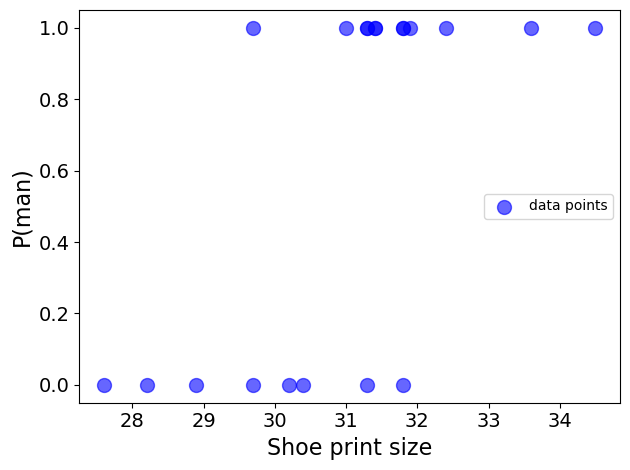

In [6]:
plot_csi_data(X_csi, y_csi)

Again, we can see that a trained Logistic Regression model will never be perfect given this dataset, we there is no way to draw a vertical line that separates all *man* and *woman* data samples.

---

## Training a Logistic Regression Model

Recall that, given a feature matrix $\mathbf{X}$, the equation for our predictions or estimates $\hat{\mathbf{y}}$ is:

$$\large
\mathbf{y} = \sigma(\mathbf{Xw})
$$

It is obvious from the formula that the quality of the predictions depend on the choice of weight vector $\mathbf{w}$. Finding the best choice of $\mathbf{w}$ for a given dataset refers to the task of training a Linear Regression model and requires to main components:

* a loss function to quantify how good or bad a current choice of $\mathbf{w}$ is, and

* a systematic way that finds $\mathbf{w}$ that minimizes that loss.


### Loss Function: How good are our weights $\mathbf{w}$?

From from the definitions of a Linear Regression model, we know that each data sample in our training data gives us two values:

* $y_{i}$: the $true$ class label $i$-th data sample (e.g., ...)

* $\hat{y}_{i}$: the $predicted$ class label $i$-th data sample returned by the model for a given set of weights $\mathbf{w}$

Of course, ideally, we would like that our predictions equal the true values, i.e., $\hat{y}_i = y_i$. For our CSI example &mdash; that is, for all datasets that are not linearly separable &mdash; achieving $\hat{y}_i = y_i$ for all training samples will not be possible. The goal of training for fitting a model is therefore to value weights $\mathbf{w}$ that make this equation true for as many data samples as possible. Since we want to find those best weights algorithmically, we need a way to quantify the difference between the predicted and the true class labels with respect to a current set of weights $\mathbf{w}$. We do this in terms of a **loss function L** (also called *error function* or *loss function*)

$$\large
L(\hat{\mathbf{y}}, \mathbf{y}) = \text{"single value reflecting the difference between predicted and true class labels"}
$$

The loss function for Logistic Regression is the so-called **Cross-Entropy (CE) Loss**, and defined as follows for an individual data sample:

$$\large
L_{CE}(\hat{y}_i, y_i) = - \left[ y_i \log \hat{y_i} + (1-y_i)\log (1 - \hat{y_i})  \right]
$$

We can also rewrite the Cross-Entropy Loss with respect to all samples in the training dataset:

$$
\begin{align}
\large L_{CE}(\hat{\mathbf{y}}, \mathbf{y}) &= \large -\frac{1}{n} \sum_{i=1}^{n} \left[ y \log \hat{y}_i + (1-y_i)\log (1 - \hat{y}_i)  \right]\\[0.5em]
&= \large - \frac{1}{n} \left[ \mathbf{y} \log \hat{\mathbf{y}}_i + (\mathbf{1}-\mathbf{y}_i)\log (\mathbf{1} - \hat{\mathbf{y}}_i)  \right]
\end{align}
$$


where
$$\large
\mathbf{1} =
\begin{bmatrix}
	1 \\
	1 \\
	\vdots \\
	1
\end{bmatrix}, \
\quad \text{and}
\quad
\log \mathbf{v} =
\begin{bmatrix}
	\log v_1 \\
	\log v_2 \\
	\vdots \\
	\log v_n
\end{bmatrix}
$$

We derive why the Cross-Entropy Loss is the appropriate loss function for Logistic Regression in a separate notebook. However, to get a better intuition of the Cross-Entropy Loss, we can plot its value for all possible values of $\hat{y}_{i}$. Note that we have to consider two cases, one where $y=1$ and the other where $y=0$. The auxiliary method `plot_ce_loss()` plots the loss function for both cases.

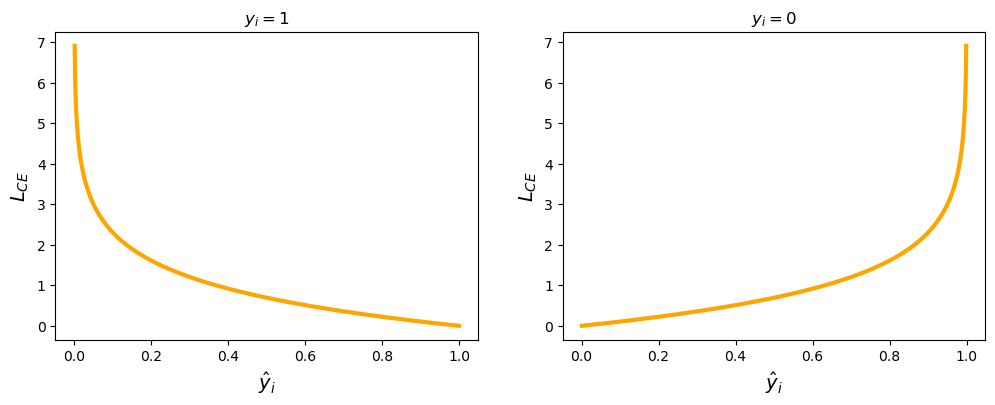

In [7]:
plot_ce_loss()

For $y_{i}=1$ (left plot), i.e., the true class label is $1$, the Cross Entropy Loss for is $0$ when $\hat{y}_{i}=1$ since the prediction matches the true value. The more $\hat{y}_{1}$ goes towards $0$ the more the loss increases. In fact, the loss goes towards infinity if $\hat{y}_{1}$ approaches $0$. Of course, this behavior of the Cross-Entropy Loss is mirrored for $y_{i}=0$ (right plot).

Using the NumPy library, we can implement the Cross-Entropy Loss with only a few lines of code; note that the method `calculate_ce()` below takes as input the data matrix $\mathbf{X}$ and set of weights $\mathbf{w}$ is input to calculate $\hat{\mathbf{y}}$:

In [8]:
def calculate_ce(X, y, w):
    # Calculate linear signal
    z = np.dot(X, w)
    # Calculate prediction output/probability
    y_hat = 1 / (1 + np.exp(-z))
    # Calculate and return Cross-Entropy Loss
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

To show some examples, we calculate the Cross-Entropy Loss for two different sets of weights $\mathbf{w}$. `ce_zero` is the Cross-Entropy Loss for $w_0 = 0$ and $w_1 = 0$, representing some arbitrary initial values for the weights; `ce_good` is the Cross-Entropy Loss for $w_0 = -30$ and $w_1 = 1$, representing weights near the minimum of the loss function for comparison.

In [9]:
ce_zero = calculate_ce(X_csi_bias, y_csi, [0, 0])
ce_good = calculate_ce(X_csi_bias, y_csi, [-30, 1])

print(f"Cross-Entropy Loss for   [0, 0]: {ce_zero:.3f}")
print(f"Cross-Entropy Loss for [-30, 1]: {ce_good:.3f}")

Cross-Entropy Loss for   [0, 0]: 0.693
Cross-Entropy Loss for [-30, 1]: 0.447


Unsurprisingly, the loss for "good" $\mathbf{w}$ values is lower than for the arbitrary values. We can also see that the lower loss &mdash; which is quite close to the minimum &mdash; is still nowhere near $0$. This has two main reasons. Firstly, we already know that our CSI example dataset is not linearly separable, so we will always make at least some errors that add to the Cross-Entropy Loss. And secondly, even if the dataset would be linearly separable and we could predict all training samples correctly, the loss is still arbitrarily unlikely to reach $0$. This is because $\hat{\mathbf{y}_{i}}$ is never exactly $0$ or $1$ because of the Sigmoid function, ignoring any precision issues in practice. The Sigmoid function only converges to $0$ and $1$ for $-\infty$ and $+\infty$ as input.

Without going into the details and reasons why in this notebook, the Cross-Entropy Loss for Logistic Regression is a convex function. This means the Cross-Entropy Loss (again, when used in Logistic Regression) has a unique minimum &mdash; there is only a unique set of values for $\mathbf{w}$ that minimize $L_{CE}$. The rather hand-wavy explanation for this is that the Logistic Regression model relies on a simple enough function, and this simplicity carries over to the loss function $L_{CE}$. When used for more complex models such as neural networks, the Cross-Entropy Loss is generally no longer convex, and therefore generally has multiple (local) minima. For Logistic Regression, however, we do not have to worry about this.

### Minimizing the Cross-Entropy Loss


#### "Silly" Approach: Random Search

The Cross-Entropy loss function tells us, how good or bad a current choice for the set of weights $\mathbf{}$ is. This includes that, if we are having two sets of weights $\mathbf{w}$ and $\mathbf{w}^\prime$, we can determine which set yields a lower loss and is therefore the better choice. We can build on this basic observation by testing a large range of different sets of weights and keep track of which set yields the lowest loss.

The code cell below accomplishes this by testing 1,000 different and (kind of) random choices for $w_0$ and $w_1$ for our CSI dataset. In each iteration, we randomly sample a value for $w_0$ and $w_1$ and calculate the Cross-Entropy Loss using our previously defined function `calculate_ce()`. If the loss for current set of weights is lower than the lowest loss so far, we update the variables `w0_random_best`, `w1_random_best`, and `mse_random_best` to keep track of the best set of weights (and the corresponding loss). Of course, after the 1,000 iterations, the variables `w0_random_best` and `w1_random_best` will contain the values for the best weights across all iterations.

**Your turn:** Try different values for `num_iterations` (e.g.: 10; 100; 10,000) and see how the result changes. In general, the lower the number of iterations the less likely we will sample a (very) good set weights resulting in an suboptimal loss. In contrast, when increasing the number of iterations, you should observe that the loss will start to converge to the true minimum.

In [10]:
# Set seed to ensure reproducible results
np.random.seed(0)

num_iterations = 1000

# Keep track of all data points for a plot
xs, ys, zs = [], [], []

# Initialize parameters
w0_random_best, w1_random_best, mse_random_best = None, None, float("inf")

for i in range(num_iterations):
    # Select a random value for weights w
    w0_random = np.random.uniform(-34, -26, 1)[0]
    w1_random = np.random.uniform(0.5, 1.5, 1)[0]
    w_random = np.asarray([w0_random, w1_random])
    # Calculate loss for selected weights w
    mse_random = calculate_ce(X_csi_bias, y_csi, w_random)
    # If the loss is lower than the currently best loss, remember all parameters
    if mse_random < mse_random_best:
        mse_random_best = mse_random
        w0_random_best = w0_random
        w1_random_best = w1_random
    # Remember current parameter values and loss for plotting
    xs.append(w0_random)
    ys.append(w1_random)
    zs.append(mse_random)
        
print("The best random values are: w0={:.3f}, w1={:.3f} (MSE loss={:.3f})".format(w0_random_best, w1_random_best, mse_random_best))

The best random values are: w0=-32.976, w1=1.083 (MSE loss=0.425)


Notice that in the code cell above we kept track of all the sets of random weights together with their losses. We can therefore plot the result to visualize how the loss depends on the choice of $w_0$ and $w_1$. We provide you with the method `plot_random_losses()` for that. Just execute the code cell below to see the plot (note: the visualization works arguably best for 1,000 iterations; but you can still plot the results for more or less iterations).

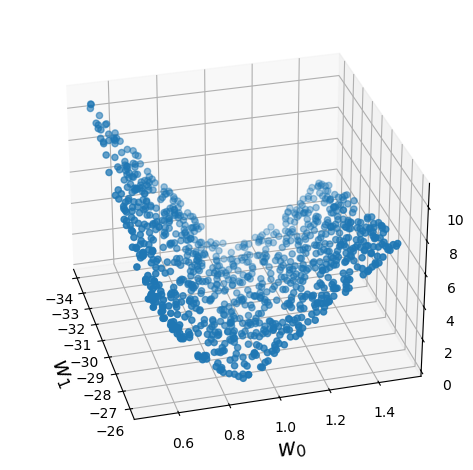

In [11]:
plot_random_losses(xs, ys, zs)

The plot clearly shows that some choices of $w_0$ and $w_1$ are objectively better as they result in a small(er) Cross-Entropy Loss. What is maybe not as obvious from the plot is that there exists a *unique* choice of weights $w_0$ and $w_1$ the smallest possible loss. In principle, random search provides a way to find the best values for $\mathbf{w}$. But it is easy to see that this is not a scalable approach in practice for two main reasons:

* Our CSI example use case has only a single feature (shoe print size). Thus, the set of $\mathbf{w}$ contains only two values $w_0$ and $w_1$. For a dataset with $d$ features, we would need to find the optimal values for $(d+1)$ weights. The problem is that the search space grows exponentially with the number of features, making a random search prohibitively expensive.

* In the example code above performing random search, the choice of $w_0$ and $w_1$ are not truly random as they were sampled from predefined ranges that were known to contain the best weight values. In practice, this information would not be available, and the sampling of the weights would need to be truly random, again vastly increasing the search space.

In short, random search is not a viable approach for training any parametric model, even such a simple model as Logistic Regression and with only a (very) small number of features.

#### Iterative Optimization using Gradient Descent

While a random search to find the best values for $\mathbf{w}$ kind of works conceptually, it is very unsystematic and therefore not practical for real-world applications. In general, training or fitting a parametric model is treated as an optimization problem. For Logistic Regression, as well as for many other machine learning models, this optimization refers to minimizing or maximizing some function. In case of a loss function such as the Cross-Entropy Loss, we want to find the parameters &mdash; here: $\mathbf{w}$ &mdash; that minimize that function.

Just to give a quick recap, finding the minimum of a function is a well-defined task in calculus. To find the minimum of a multivariate function $f(w_0, w_1, w_2, \dots)$ using calculus, we typically to perform the following three steps:

* **(1) Find all 1st Partial Derivatives:** Compute the partial derivatives of $f$ with respect to each variable $w_i$. This means that for a function $f(w_0, w_1, w_2, \dots)$, we need to find
$$\large
\frac{\partial f}{\partial w_0}\text{, } \frac{\partial f}{\partial w_1}\text{, } \frac{\partial f}{\partial w_2}\text{, } \dots
$$

* **(2) Set the Partial Derivatives to Zero and solve for all parameters**: Setting all partial derivatives gives us the following systems of equations:
$$\large
\frac{\partial f}{\partial w_0}=0\text{, } \frac{\partial f}{\partial w_1}=0\text{, } \frac{\partial f}{\partial w_2}\text=0{, } \dots
$$
Assuming we have our $(d+1)$ parameters $w_i$ of our Linear Regression Model, this system contains $(d+1)$ equations that are all set to $0$. All solutions &mdash; that is, all combinations of values for $w_i$ that result in all partial derivatives to be zero &mdash; indicate an extreme value (minimum, maximum, or saddle point) of function $f$.

* **(3) Use the Second Partial Derivative Test:** Step (2) only tells us if we have found an extreme value. This means we still need to determine if we indeed found a minimum (and not a maximum or saddle point). This is done by calculating the 2nd partial derivatives of function $f$ and checking if their values at the point of the extreme value are positive, negative, or zero. However, in the context of training parametric models such as Linear Regression, this last check is generally not required since we "know" that our extreme value must be a minimum. Think about why this is first, before we provide the answer at the end of the notebook.

So let's see how far we can apply these steps to minimize the Cross-Entropy Loss. We first need to calculate the 1st partial derivatives of the Cross-Entropy Loss $L_{CE}$ with respect to all parameters $w_i$. Recall that the Cross-Entropy Loss for all training data sample is defined as:

$$
\begin{align}
\large L_{CE}(\hat{\mathbf{y}}, \mathbf{y}) &= \large -\frac{1}{n} \sum_{i=1}^{n} \left[ y \log \hat{y}_i + (1-y_i)\log (1 - \hat{y}_i)  \right]\\[0.5em]
&= \large -\frac{1}{n} \sum_{i=1}^{n} \left[ y \log \sigma(\mathbf{w}^T\mathbf{x}_{i}) + (1-y_i)\log (1 - \sigma(\mathbf{w}^T\mathbf{x}_{i}))  \right]\\[0.5em]
&= \large -\frac{1}{n} \sum_{i=1}^{n} \left[ y \log \left( \frac{1}{ 1 + e^{-\mathbf{w}^T\mathbf{x}_i}} \right) + (1-y_i)\log \left( 1 - \frac{1}{ 1 + e^{-\mathbf{w}^T\mathbf{x}_i}} \right)  \right]
\end{align}
$$

where $\mathbf{w}^T = [w_0, w_1, \dots, w_d]$.

Following Step (1), we now have to calculate all 1st partial derivatives of $\nabla_{\mathbf{w}}L_{CE}$ with respect to all parameters $w_j$. We provide a detailed walk through the math in a separate notebook, and directly provide the solutions here.

$$\large
\frac{\partial L_{CE}}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} x_{ij} \left(\sigma(\mathbf{w}^Tx_i) - y_i \right)
$$

We, again, can use the matrix notation to calculate the 1st derivative $L_{MSE}$ with respect to $\mathbf{w}$, i.e., with respect to *all* parameters $w_i$ using single formula:

$$\large
\frac{\partial L_{CE}}{\partial \mathbf{w}} = \frac{1}{n}\mathbf{X}^T(\sigma(\mathbf{X}\mathbf{w}) - \mathbf{y})
$$

Having the 1st derivative  of the Cross Entropy Loss, Step (2) would now require to set this derivative $0$ and solve for $\mathbf{w}$. However, the Sigmoid function $\sigma$ introduces a non-linear relationship between the parameters $\mathbf{w}$ and the predictions $\mathbf{y}$. This nonlinearity carries over to the loss function $L_{CE}$, making it non-convex in general settings and impossible to solve analytically. In other words, after setting the 1st derivative to $0$, i.e.:

$$\large
\frac{1}{n}\mathbf{X}^T(\sigma(\mathbf{X}\mathbf{w}) - \mathbf{y}) = \mathbf{0}
$$

We cannot solve this equation for $\mathbf{w}$ such that $\mathbf{w}$ is on one side of the equation and a closed-form solution on the other side of the equation. This means that we have to apply iterative methods to minimize the Cross-Entropy Loss for training or fitting a Logistic Regression model. One of the most general-purpose optimization methods is Gradient Descent. If you are unfamiliar with Gradient Descent, we have a whole topic covering this method. In a nutshell, the gradient of a function $f$ for a given set of parameters &mdash; in our case $\mathbf{w}$ &mdash; is the vector pointing to the steepest ascent at this point of $f$. Mathematically, the gradient $\nabla_{\mathbf{w}}f$ of a function $f$ with respect to parameters $\mathbf{w} = \{w_0, w_1, w_2, \dots, w_d \}$ is defined as follows:

$$\large
\nabla_{\mathbf{w}}f = \begin{bmatrix}
 	\frac{\partial f}{\partial w_0}\\
 	\frac{\partial f}{\partial w_0}\\
 	\frac{\partial f}{\partial w_0}\\
 	\vdots \\
 	\frac{\partial f}{\partial w_d}\\
\end{bmatrix}
$$

for a given set of values for $\{w_0, w_1, w_2, \dots, w_d \}$. Using the matrix notation this simplifies to

$$\large
\nabla_{\mathbf{w}}f = \frac{\partial f}{\partial \mathbf{w}}
$$

for a given set of values for $\mathbf{w}$. Since we already calculated the 1st partial derivatives for our MSE loss function $L_{MSE}$, we can therefore calculate its gradient with:

$$\large
\nabla_{\mathbf{w}}L_{CE} = \frac{2}{n}\mathbf{X}^T(\sigma(\mathbf{X}\mathbf{w}) - \mathbf{y})
$$

We can directly implement this formula for calculating the gradient using the following Python method `calculate_ce_gradient()`:

In [12]:
def calculate_ce_gradient(X, y, w):
    # Calculate linear signal
    z = np.dot(X, w)
    # Calculate predicted output/probability
    y_hat = 1 / (1 + np.exp(-z))
    # Calculate and return gradient
    return np.dot(X.T, (y_hat - y)) / y.shape[0]

To try out this method, we can run it for our CSI example dataset using some initial values for $\mathbf{w}$, here `[0, 0]` (i.e., $w_0=0 and $w_1$) by default.

In [13]:
ce_grad_zero = calculate_ce_gradient(X_csi_bias, y_csi, [0, 0])

print(f"Gradients for [0, 0]: {ce_grad_zero}")

Gradients for [0, 0]: [-0.1 -3.6]


If you used `[0, 0]` as input for the initial choice of $\mathbf{w}$ gradient of

$$\large
\nabla_{\mathbf{w}}L_{CE} =  \begin{bmatrix}
	-0.1\\
	-3.6
\end{bmatrix}
$$

So how can we use this gradient to change the values of $w_0$ and $w_1$ in such a way that to minimize the loss. We can interpret the gradient as follows:

* Since the gradient $\nabla_{\mathbf{w}}L_{CE}$ points into the direction of the steepest ascent and both $w_0$ and $w_1$, slightly increasing any of the two values will decrease the loss.

* Since the component of the gradient for $w_1$ is larger than the one for $w_0$, a change in $w_1$ will have a greater effect on the loss than the same change in $w_0$.

* The absolute values of the gradient do *not* directly tell us how much we should actually change $w_0$ and $w_1$. This observation brings to the introduction of the so-called **learning rate**. The learning rate is nothing but a scaling factor we apply to the gradient to get the value by which we update all $w_i$. Typical values for the learning rate are $0.01 \dots 0.00001$, but the most suitable values can vary widely in practice depending on the task, model, and dataset.

With our method for calculating the gradient, we can implement the method `fit_gradient_descent` to train or fit a Linear Regression model using Gradient Descent. Again, if something might not be clear here, you can learn all about Gradient Descent as a separate topic.

In [14]:
def fit_gradient_descent(X, y, lr=0.001, num_iter=10, verbose=False):
    # Initialize w as vector with all elements being 0
    w = np.zeros(X.shape[1])
    
    for i in range(num_iter):
        # Calculate gradient w.r.t. w
        gradient = calculate_ce_gradient(X, y, w)
        # Update step: adjust weights w.r.t. gradient and learning rate
        w -= lr * gradient
        # Print loss every 10% of the iterations
        if verbose == True:
            if(i % (num_iter/10) == 0):
                print('Loss: {:.3f} \t {:.0f}%'.format(calculate_ce(X, y, w), (i / (num_iter/100))))
    # Print final loss
    print('Loss: {:.3f} \t 100%'.format(calculate_ce(X, y, w)))
    # Return final set of weights w
    return w

We have now everything to train or fit a Logistic Regression model for our CSI example dataset. So let's do this by running the code cell below.

In [15]:
w_gradient_descent_fit = fit_gradient_descent(X_csi_bias, y_csi, lr=0.005, num_iter=1000000, verbose=True)

print(f"The best weights using Gradient Descent are: w0={w_gradient_descent_fit[0]:.3f}, w1={w_gradient_descent_fit[1]:.3f}")

Loss: 0.667 	 0%
Loss: 0.574 	 10%
Loss: 0.523 	 20%
Loss: 0.493 	 30%
Loss: 0.474 	 40%
Loss: 0.460 	 50%
Loss: 0.451 	 60%
Loss: 0.444 	 70%
Loss: 0.439 	 80%
Loss: 0.434 	 90%
Loss: 0.431 	 100%
The best weights using Gradient Descent are: w0=-29.704, w1=0.976


If you have run the code cell above with the input parameters `lr=0.005` (learning rate) and `num_iter=1000000` (maximum number of iterations), should as a result values $w_0=-29.704$ and $w_1=0.976$ &mdash; recall that already hinted at that $w_0=-30$ and $w_1=1$, is close to the minimum loss. However, you might have also noticed that running the code cell with 1,000,000 iterations took a few seconds despite our dataset being that small.

**Your turn:** Run the previous code with less number of iterations to see that the method does not reach the (close to) best values for $w_0$ and $w_1$.

The reason is that near the optimal solution the loss is already very close to the minimum. This means that the gradient at this point is very small, and even more so after scaling it further down by multiplying it with the learning rate. In other words, after 100,000 iterations, the updates to the weights $w_i$ are almost negligible. To visualize this, we can plot the loss function for the same range of $w_0$ and $w_1$ ranges we used for the random search. The plotting of the loss function is implemented in the auxiliary method `plot_loss_function()` in the file `src/utils.py` &mdash; feel free to check it out. Since the loss does depend on the dataset described by $\mathbf{X}$ and $\mathbf{y}$, we also have to give this information to the methods. Run the code cell below to see the result.

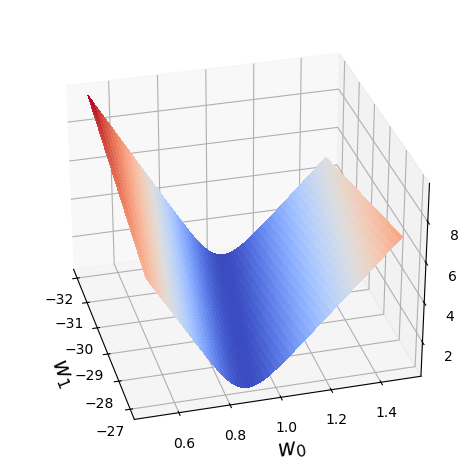

In [16]:
# Specify all possible combinations of w0 and w1 we want to consider
w0_range = np.arange(-32, -27, 0.01)
w1_range = np.arange(0.5, 1.5, 0.01)

# Plot loss function
plot_loss_function(X_csi_bias, y_csi, w0_range, w1_range, calculate_ce)

Of course, the overall shape of the curve reflects the shape of the data point we have seen in the plot for the random search. Only instead of having a fixed size of random choice of $\mathbf{w}$, we now have a continuous curve. Just by looking at the plot above, you might think that the blue area of the curve is flat. However, we already know from the math that the Cross-Entropy Loss has a unique minimum. This means that the curve in the plot above has indeed one unique location where the loss is the smallest, it's just not distinguishable with the naked eye. However, this also means there are many other choices of $\mathbf{w}$ where the loss is almost minimal. For these values of $\mathbf{w}$ the gradient and therefore the update to the $\mathbf{w}$ values will be very, very small.

However, you need to keep in mind that the shape of the loss function depends on the dataset. As such, for other datasets the unique minimum might be more or less pronounced as for our CSI example dataset here. Also, we could only easily plot the curve of the loss function because our CSI data has only one input feature, and therefore the model has only two weights $w_0$ and $w_1$. With those learned weights, we can now plot the dataset again but now include the Sigmoid function described by  $w_0$ and $w_1$.

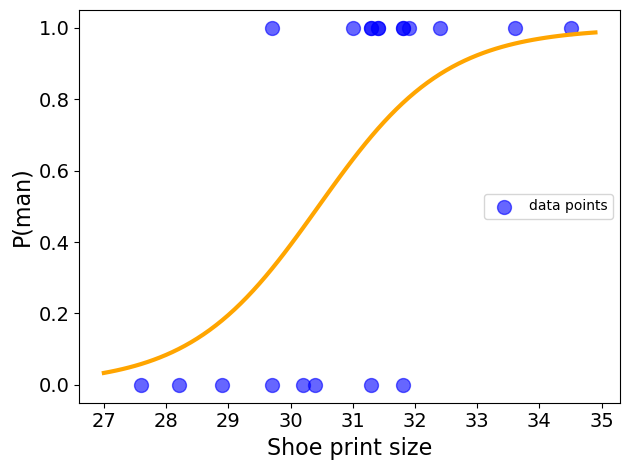

In [17]:
plot_csi_data(X_csi, y_csi, w=w_gradient_descent_fit)

#### Making Predictions

The last remaining step is now to use our trained model &mdash; which is completely described by the weights $\mathbf{w}$ &mdash; to predict the sex of the suspect, assuming that the show print size we found is $32.2$. Making a prediction simply for an unseen data sample $x_{new}$ means to calculate $\hat{y}_{new}$ as the probability of belonging to Class $0$ or Class $1$. This decision is done by checking if $\hat{y}_{new}$ is less than $0.5$ (Class $0$) or greater or equal than $0.5$ (Class $1$). As usual, this is very easy to implement using the NumPy library, see the code cell below.

In [18]:
def predict(X, w):
    # Calculate linear signale
    z = np.dot(X, w)
    # Calculate prediction output/probability
    y_hat = 1 / (1 + np.exp(-z))
    # Return 0 or 1 depending on probability y_hat
    return (y_hat >= 0.5)*1

Notice that the method `predict()` accepts as input multiple unseen data samples and as such can return multiple predictions. The `*1` at the very end is a simple trick to convert the Boolean values `True` and `False` as return by `(y_hat >= 0.5)` into $0$ and $1$ where $0$ represents `False` and $1$ represents `True`. Finally, it is time to predict the sex of our suspect:

In [19]:
# Create data matrix for our single unseen data sample for our suspect
X_suspect = [[1, 32.2]]

# Calculate predicted class label
prediction_csi = predict(X_suspect, w_gradient_descent_fit)[0]

print(f"The suspect is most likely of Class {prediction_csi} (0=woman, 1-man)")

The suspect is most likely of Class 1 (0=woman, 1-man)


We can also plot the dataset where we assign each data sample a different color depending on the predicted class label. For this we first need to predict the class labels for all data samples in our CSI example dataset using the Logistic Regression model we have trained.

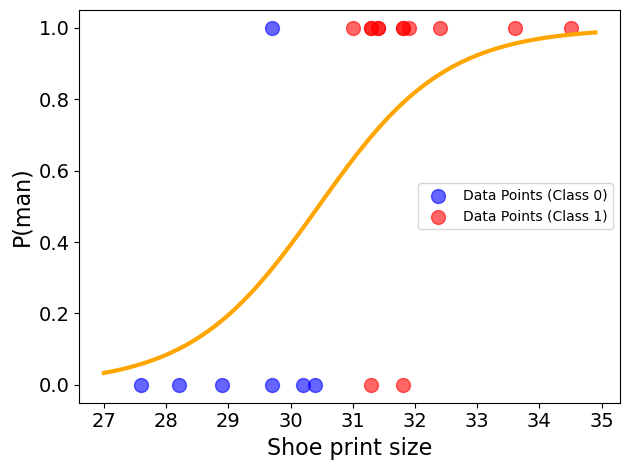

In [20]:
# Predict class labels for each data samples
y_csi_pred = predict(X_csi_bias, w_gradient_descent_fit)

# Plot data samples; color data points w.r.t. predicted class
plot_csi_data(X_csi, y_csi, y_pred=y_csi_pred, w=w_gradient_descent_fit)

We already know from looking at the data that the dataset is not linearly separable, and therefore our model will make some errors. The plot above also confirms this. Recall that in this visualization all data points on the lower row are *women*. However, notice the two red data points indicated that two **women** have been wrongly predicted to be *men*. Vice version, looking at the upper row of data points, one *man* has wrongly been predicted to be a *woman*.

---

## Practical Applications

Logistic Regression is simple enough that training such a model can easily be implemented from scratch; as we have done above. In practice, however, we typically use implementations from popular data science and machine learning libraries. For one, using these implementations simplify the training by writing much less code. For another, existing implementations reduce the risk of coding error, and they are often optimized to ensure a good performance in terms of runtime.

In the following, we will use the [scikit-learn](https://scikit-learn.org/). Scikit-learn is a popular open-source machine learning library in Python, widely used for building and analyzing predictive data models. Built on top of foundational libraries like NumPy, SciPy, and matplotlib, it provides simple and efficient tools for data mining, data analysis, and machine learning tasks. Scikit-learn supports a wide range of supervised and unsupervised learning algorithms, including regression, classification, clustering, and dimensionality reduction. This library comes with its own implementation of [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), which we will use in the following examples.

### CSI Example Dataset

We first look at our CSI example dataset again, although we already found the best weights $\mathbf{w}$. However, let's assume we got this dataset as a `csv` file to train a Linear Regression model. As such, the first step is to load the data file. Particularly when working with `csv` files, the pandas library offers convenient ways to do this:

In [21]:
# Load data file into pandas DataFrame
df_csi = pd.read_csv(csi_gender)

# Show the first 5 entries of the DataFrame
df_csi.head()

,shoe print size,sex
0,27.6,0
1,28.2,0
2,28.9,0
3,29.7,1
4,29.7,0


This DataFrame contains the complete dataset including the input feature (shoe print size) and the target outputs (height). We therefore need to extract our data matrix $\mathbf{X}$ and our label vector $\mathbf{y}$ from the DataFrame. The `to_numpy()` method in pandas is used to convert a pandas DataFrame or Series into a NumPy array. It provides a way to access the underlying data of these structures in a format that is compatible with NumPy, which is often required for numerical computations or integration with other libraries such as scikit-learn.

In [22]:
X_csi = df_csi[['shoe print size']].to_numpy()
y_csi = df_csi[['sex']].to_numpy().squeeze()

We have now already everything in place to train a Logistic Regression model; see the code cell above. In scikit-learn, the `fit()` method is a fundamental function used to train a machine learning model. It adjusts the model's parameters based on the provided training data and, for supervised learning algorithms, their corresponding target values. This method is used by all models (incl. [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) in scikit-learn and is critical for enabling the model to learn patterns from data.

In [23]:
model_csi = LogisticRegression().fit(X_csi, y_csi)

Let's check if the weights from the model (roughly) match the results we got from using our implementation based on Gradient Descent.

In [24]:
w0_csi = model_csi.intercept_[0]
w1_csi = model_csi.coef_[0][0]

print(f"The best are: w0={w0_csi:.3f}, w1={w1_csi:.3f}")

The best are: w0=-32.939, w1=1.080


While probably not identical, the values for $w_0$ and $w_1$ here, should be quite similar to their values using our own implementation above.

A common way to visualize the performance of a classifier is [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). A confusion matrix is a table used to evaluate the performance of a classification model by comparing the actual class labels with the predicted labels. It provides a detailed breakdown of correct and incorrect predictions across different classes, helping identify how well a model distinguishes between them. Each row of the matrix represents the true class, while each column represents the predicted class (or vice versa). For convenience, we provide an auxiliary method `plot_confusion_matrix()` to plot a confusion matrix.

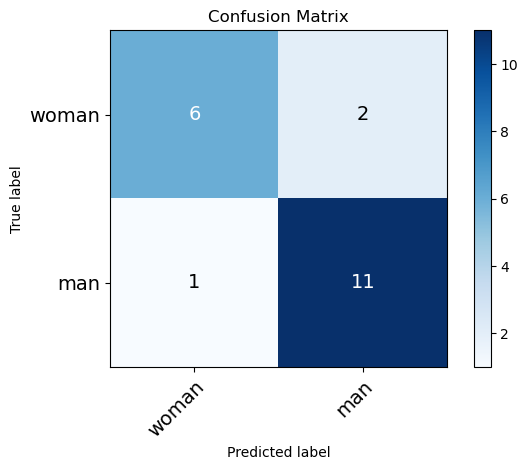

In [25]:
plot_confusion_matrix(y_csi, y_csi_pred, classes=["woman","man"])

The confusion matrix mirrors the result we saw earlier, including the misclassification of two $woman$ as $men$ and the misclassification of one *man* as a *woman*.

Finally, we can use this model to make predictions. Let's assume that the shoe print that we found at the crime size had a size of 32.2 cm. The `predict()` method in scikit-learn is used to make predictions based on a trained machine learning model. After a model has been fitted to data using the `fit()` method, the `predict()` method takes new input data and returns the predicted output (e.g., class labels, regression values, or cluster assignments) based on the learned parameters.

The `predict()` method expects a data matrix $\mathbf{X}$ that may contain multiple unseen data samples with multiple features. Although we only have one data sample with only one feature, we still need to represent this single value as a data matrix. Thus, instead of just using `32.2` as input for the `predict()` method, we need to represent the input as a matrix using `[[32.2]]`. The output of the `predict()` method is the list (or vector) of predicted values for all input data samples. Again, since we only have only one data sample, our final prediction is simply the first entry in this list.

In [26]:
gender_suspect = model_csi.predict([[32.2]])[0]

print(f"The estimated height of the suspect is {gender_suspect:.1f} (0=female, 1=male)")

The estimated height of the suspect is 1.0 (0=female, 1=male)


Instead of the (final) class label, we can also ask the model to give us the probability. The `predict_proba()` method in scikit-learn is used to predict the probabilities of class membership for each sample in a dataset. Unlike the `predict()` method, which assigns a definitive class label, `predict_proba()` allows one to see not just the model's prediction, but also the confidence it has in that prediction. So let's do this for our suspect:

In [27]:
gender_suspect_prob = model_csi.predict_proba([[32.2]])[0]

print(f"Probability P(Y=1|X=x) = {gender_suspect_prob[gender_suspect]:.2f}")

Probability P(Y=1|X=x) = 0.86


This means that the model thinks that a shoe print with a size of 32.2 cm is with a *man* with a probability of 86%.

### Breast Cancer Classification

The [Breast Cancer Classification (Wisconsin)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset is a widely used benchmark dataset in machine learning and statistical research for the binary classification task of predicting whether a breast tumor is benign or malignant based on various physical and clinical characteristics of the tumor. It is derived from digitized images of fine needle aspirates (FNAs) of breast masses and contains features that describe the morphology of the tumor cells.

The dataset consists of 569 instances, each representing a unique case. It includes 30 numeric features computed from a digitized image of a fine needle aspirate of a breast mass. These features are derived from three types of measurements: mean, standard error, and worst (or largest) values for each cell nucleus. The features measure properties like radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension. The outcome (target variable) is binary: 0 for benign tumors and 1 for malignant tumors. The malignant and benign cases are distributed as 212 and 357 instances, respectively, making the dataset approximately 62.7% benign and 37.3% malignant. This balance minimizes bias in the model predictions, though class imbalance techniques might still improve model performance.

The dataset comes as a `csv` file, so first let's read the file into a pandas DataFrame:

In [28]:
df_bcc = pd.read_csv(breast_cancer)

df_bcc.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,26.17,161.70,1750.0,0.1228,0.23110,0.31580,0.14450,0.2238,0.07127,1
1,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,20.50,97.67,677.3,0.1478,0.22560,0.30090,0.09722,0.3849,0.08633,0
2,10.17,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020,0
3,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,27.57,125.40,832.7,0.1419,0.70900,0.90190,0.24750,0.2866,0.11550,1
4,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,47.16,214.00,3432.0,0.1401,0.26440,0.34420,0.16590,0.2868,0.08218,1


The first 30 columns represent the independent variables, i.e., the features, organized as follows:

* 1-10: the mean of the radius, texture, perimeter, etc. values
* 11-20: the standard errors of the radius, texture, perimeter, etc. values
* 21-30: the worst (or largest) value of the radius, texture, perimeter, etc.

Notice that no values are missing and all features are numerical; so there is no need for any further cleaning, preprocessing, or encoding steps. The last column contains the class labels $0$ (*benign*) and $1$ (*malignant*).

To prepare our dataset for training a Logistic Regression model, we first have to extract the data matrix $\mathbf{X}$ and the label vector $\mathbf{y}$ from DataFrame again. To keep the example a bit more simple, we only consider the first 10 features (i.e., the mean of all values).

**Your turn:** You can change all the relevant lines of code below to train a Logistic Regression model that uses all 30 features to see how it affects the results.

In [29]:
X_bcc = df_bcc.iloc[:, 0:10].to_numpy()
y_bcc = df_bcc.iloc[:, -1].to_numpy().squeeze()

Instead of using the full dataset for training &mdash; as we have done for the CSI example dataset &mdash; we split the dataset into a training and a test dataset. Using only the training dataset for actually fitting the Linear Regression model, we can then use the test dataset to evaluate the quality of the model. The `train_test_split()` method of the scikit-learn library makes the step of splitting the dataset into a training and test dataset very easy. In the code cell below we set `test_size=0.25`. This means that we want to use 25% of the total dataset for testing, and the remaining 75% for training.

In [30]:
# Split dataset in training and test data (20% test data)
X_bcc_train, X_bcc_test, y_bcc_train, y_bcc_test = train_test_split(X_bcc, y_bcc, test_size=0.25, random_state=0)

print(f"Size of training dataset: {len(X_bcc_train)}")
print(f"Size of test dataset: {len(X_bcc_test)}")

Size of training dataset: 426
Size of test dataset: 143


#### Basic Classification

With the training dataset training, we can fit a Linear Regression model. Of course, we use the [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation from the scikit-learn library for this again.

In [31]:
model_bcc = LogisticRegression(max_iter=1000).fit(X_bcc_train, y_bcc_train)

To assess the quality of our trained model, we can use the test dataset. For this, we first use the `predict()` method of our model to get the predicted class labels for all 143 samples in the test dataset.

In [32]:
y_bcc_pred = model_bcc.predict(X_bcc_test)

We can visualize the result using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to show for how many test samples our model makes the correct or a wrong prediction. To this end, we provide the auxiliary method `plot_confusion_matrix()` to calculate entries and plot the confusion matrix. Just run the code cell below.

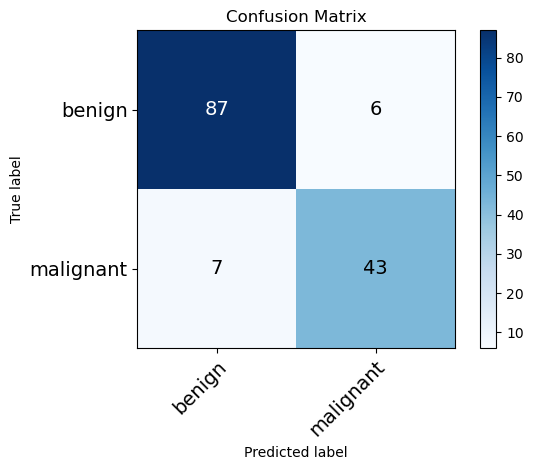

In [33]:
plot_confusion_matrix(y_bcc_test, y_bcc_pred, classes=["benign","malignant"])

Overall, our model performs quite well. For 130 out of the 143 test samples, the model predicts the correct class label, i.e., where the true label and the predicted label match. For 13 test samples, the true label and the predicted label do not match; these are considered model errors. This example also shows that not all errors are always equally bad. For example, predicting a malignant case as benign can be considered a worse error than predicting a benign case as malignant. However, deeper discussion about the proper [evaluation of classifiers](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) is beyond the scope of this notebook.

#### Classification using Standardized Data

If we only care about using a trained model to make predictions, we could stop here. However, important insights also come from trying to understand the model. One of the most fundamental information we often want to know is which features had the most effect on the model's prediction, or which feature did not. For example, if a Feature $A$ was much more important than a Feature $B$, and Feature $B$ might be very challenging to collect, measure, or otherwise acquire, we could simply ignore Feature $B$. Or for our Breast Cancer dataset, if the radius of a cell nucleus is a more indicative feature than its area to predict if a case is benign or malignant, it can make recommendations where to best focus when trying to improve the data collection.

The importance of features in a trained Logistic Regression model can be determined directly from the coefficients (i.e., the weights), as the absolute value of the coefficient reflects the strength of a feature's influence on the model:

* Features with larger absolute coefficients have a stronger effect.
* Features with smaller absolute coefficients have a weaker effect.

However, the coefficients are only meaningfully comparable if the values of the all features are of a similar range. For example, if a feature has values ranging from, say, $0.001$ to $0.001$, and another feature ranging from $100$ to $1,000$, both their respective coefficients are likely to be of very different magnitude. If the original data has features with values of very varying magnitudes, we first have to perform [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling). A very common approach is [Standardization (Z-score Normalization)](https://en.wikipedia.org/wiki/Standard_score), a statistical technique used to scale data so that it has a mean of 0 and a standard deviation of 1. This method ensures that features with different units or ranges are normalized to a consistent scale, which is particularly important in machine learning algorithms that are sensitive to feature scaling, such as Logistic Regression. For each feature $x$ in the dataset, z-score normalization transforms the value of each data point $x_i$ as follows:

$$\large
z_i = \frac{x_i - \mu}{\sigma}
$$

Where:

* $z_i$ is the normalized value for the data point $x_i$
* $x_i$ is the original value of the data point
* $\mu$ is the mean of the feature values
* $\sigma$ is the standard deviation of the feature values

After normalization the mean of the transformed feature is $0$, and the standard deviation of the transformed feature is $1$. The `StandardScaler` class in the scikit-learn library is a preprocessing tool used to perform z-score normalization on a dataset.

In [34]:
sc = StandardScaler()

X_bcc_train_scaled = sc.fit_transform(X_bcc_train)
X_bcc_test_scaled = sc.transform (X_bcc_test)

After standardizing all features, the remaining steps are the same. First, training the model...

In [35]:
model_bcc_scaled = LogisticRegression(max_iter=10000).fit(X_bcc_train_scaled, y_bcc_train)

Secondly, predicting the class labels for all test samples...

In [36]:
y_bcc_scaled_pred = model_bcc_scaled.predict(X_bcc_test_scaled)

Lastly, evaluating the model by plotting the confusion matrix...

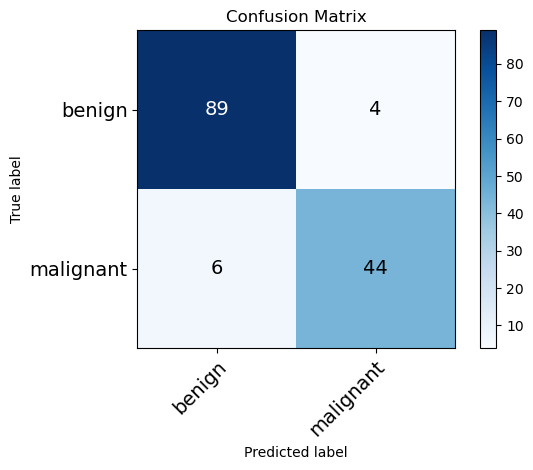

In [37]:
plot_confusion_matrix(y_bcc_test, y_bcc_scaled_pred, classes=["benign","malignant"])

If you compare both confusion matrices, you will notice some minor differences. However, the performance of a Logistic Regression model purely by minimizing the Cross-Entropy is not affected by the data being standardized or not. So why do we have some differences here? There are several possible reason for that:

* **Impact on Optimization:** Logistic regression models in scikit-learn typically use numerical optimization to find the coefficients that best fit the data. If the features are not standardized, their scales can vary significantly. This scale disparity makes the optimization landscape more irregular, potentially leading to slower convergence or suboptimal solutions. Standardization (e.g., scaling features to have zero mean and unit variance) ensures all features contribute equally to the optimization, making the process more efficient and robust.

* **Effect on Regularization:** Scikit-learn's `LogisticRegression` uses regularization (L1, L2, or elastic net) by default to prevent overfitting. Regularization penalizes large coefficients, but the penalty assumes that all features are on a similar scale. Without standardization, features with larger magnitudes disproportionately influence the penalty, skewing the learned coefficients. This can result in less accurate or interpretable models. Standardizing the data ensures the regularization term treats all features fairly, leading to more meaningful coefficients.

* **Numerical Stability:** Standardization improves numerical stability in computation. When features have vastly different scales, the calculations required for matrix inversion or gradient updates in the optimization process may suffer from floating-point errors. Standardizing features mitigates this risk, ensuring more stable and reliable results.

Now that we trained a model using standardized data, we can look at the coefficients (i.e., the weights) to see which features are more important &mdash; that is, have larger effects on the model predictions. First, let's extract the weights for convenience.

In [38]:
weights = model_bcc_scaled.coef_[0]

`weights` is a simple list containing all the coefficients of all features: $\text{weights} = [w_1, w_2, \dots, w_{10}]$, assuming we use only the first 10 features of the original dataset. Note that $w_0$ is missing here, as we are only interested in the weights associated with an input feature.

The code cell below connects the feature names with the weights as well as with the absolute value of the weights. We need the absolute values of the weights later to determine a feature's importance. The importance of a feature does not depend on the sign but only on its absolute values.

In [39]:
# Create a list of tuples (name, weight, abs(weight)) all features
features = [ (feature, weights[i], np.abs(weights[i])) for i, feature in enumerate(df_bcc.columns[0:10]) ]

# Print the 3 values for the first 5 tuples
for feature in features[:5]:
    print(feature)

('radius1', 1.0573166077553142, 1.0573166077553142)
('texture1', 1.2786172974665637, 1.2786172974665637)
('perimeter1', 1.0363185603156182, 1.0363185603156182)
('area1', 1.0612367302087162, 1.0612367302087162)
('smoothness1', 0.5040887984602725, 0.5040887984602725)


Lastly, we can sort all features by the absolute values of their weights, reflected by the 3rd value in the tuple for each feature. Sorting a list of tuples based on the value of some tuple entry is very easy to do in Python. The code cell below accomplishes for our use case.

In [40]:
features_ranked = sorted(features, key=lambda x: x[2], reverse=True)

So let's have a look at the feature ranking:

In [41]:
for feature in features_ranked:
    print(f"[Importance: {feature[1]:.2f}] {feature[0]}")

[Importance: 1.68] concave_points1
[Importance: 1.28] texture1
[Importance: 1.09] concavity1
[Importance: 1.06] area1
[Importance: 1.06] radius1
[Importance: 1.04] perimeter1
[Importance: 0.50] smoothness1
[Importance: -0.36] fractal_dimension1
[Importance: 0.29] symmetry1
[Importance: -0.12] compactness1


The results show that the feature `concave_points1` (i.e., its value for a data sample) has the most effect on the model predictions. In contrast, `compactness1` has only a (limited) effect on the predictions.

---

## Summary

Logistic Regression is a statistical method used for modeling the probability of a binary or categorical outcome based on one or more predictor variables. Despite its name, it is not a regression technique in the traditional sense but rather a classification algorithm. Logistic Regression uses a Logistic function (or sigmoid curve) to map any real-valued input to a probability between 0 and 1, making it ideal for binary classification tasks like spam detection, medical diagnosis, and credit risk assessment.

The model estimates the relationship between the independent variables (features) and the dependent variable (outcome) using a set of coefficients. These coefficients are found by maximizing the likelihood of observing the given data, a process known as Maximum Likelihood Estimation (MLE). Logistic Regression can handle both linear relationships and, with feature engineering or extensions, non-linear relationships, making it versatile and applicable to various scenarios.

Learning Logistic Regression is important because it serves as a foundational tool in both statistics and machine learning. It is simple yet effective, offering interpretable results that help in understanding how different factors influence the predicted outcome. For example, the coefficients in Logistic Regression can reveal the relative importance of features in determining the outcome, which is especially valuable in fields like healthcare or social sciences, where interpretability is critical.

Moreover, Logistic Regression introduces key concepts like regularization, likelihood functions, and classification thresholds, which are fundamental to more advanced machine learning algorithms. It also demonstrates the importance of preprocessing techniques, such as standardization and feature scaling, which are common practices across many models. By learning Logistic Regression, practitioners gain a strong conceptual and practical foundation for tackling real-world classification problems and progressing to more sophisticated methods.